In [ ]:
# FLOP/s = cores * cycles/second * flops/cycle

Linear FLOPS:  5.520397834792941
Linear Arith Intensity: 1.8160759786889042


Text(0, 0.5, 'Performance (FLOPS/cycle)')

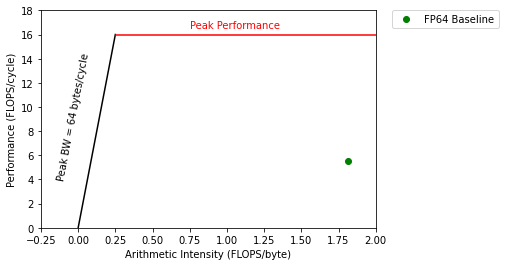

In [51]:
from tkinter.tix import ButtonBox
import matplotlib.pyplot as plt
import numpy as np
# Occamy Peak FLOPS for FP64:
# FMADD: 2 instructions per cycle
# FP operands = 1 operand per instruction
# DMA peak bandwidth = 512 bits/cycle
# Peak FLOPS/cycle = FP operands/instruction * instructions/cycle 

peak_BW = 64 # bytes/cycle

IN_CH = 784
OUT_CH = 10

NUM_BYTES = 8

NUM_CORES = 8

FMAC_FLOPS = 2 * NUM_CORES

NUM_CYCLES = 22723

LINEAR_FLOPS = IN_CH * OUT_CH * FMAC_FLOPS / NUM_CYCLES

print("Linear FLOPS: ", LINEAR_FLOPS)

PREC = 1 # precision: 1 = FP64, 2 = FP32, 4 = FP16, 8 = FP8
peak_performance = 2 * NUM_CORES# instructions/cycle

linear_bytes = (IN_CH * OUT_CH + IN_CH + OUT_CH) * NUM_BYTES / PREC

linear_flops = IN_CH * OUT_CH * FMAC_FLOPS 

linear_arith_intensity = linear_flops / linear_bytes 

print("Linear Arith Intensity:", linear_arith_intensity)

# plot the roofline plot
# y-axis: operations per cycle (perfromance)
# x-axis: operations per byte (intensity)

x = np.linspace(0, 0.25, 100)
y = peak_BW * x 

ax = plt.gca()
ax.plot(x, y, '-', color='black')
plt.text(-0.15, 4, 'Peak BW = %d bytes/cycle' % peak_BW, fontsize=10, rotation = 79 )
ax.axhline(y=peak_performance, color='r', linestyle='-', xmin = 0.225, xmax = 2)
ax.plot(linear_arith_intensity, LINEAR_FLOPS, 'o', color='green', label='FP64 Baseline')
plt.text(0.75, 16.5,'Peak Performance', fontsize=10, color='red')
ax.set_xlim([-0.25, 2])
ax.set_ylim([0, peak_performance + 2])
# legend next to the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Arithmetic Intensity (FLOPS/byte)')
plt.ylabel('Performance (FLOPS/cycle)')


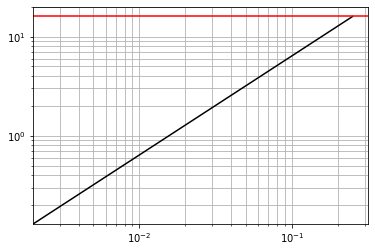

In [8]:
# draw the plot as log log plot
plt.loglog(x, y, '-', color='black', label='Roofline')
plt.axhline(y=peak_performance, color='r', linestyle='-')
# grid lines
plt.grid(True, which='both')